# Trabajando base "airbnb "

In [ ]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
airbnb = pd.read_csv('/content/drive/MyDrive/Data_Challenge/airbnb_limpio.csv')
airbnb.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data_Challenge/airbnb_limpio.csv'

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26401 non-null  float64
 1   name                            26401 non-null  object 
 2   host_id                         26401 non-null  int64  
 3   host_name                       25544 non-null  object 
 4   neighbourhood                   26401 non-null  object 
 5   latitude                        26401 non-null  float64
 6   longitude                       26401 non-null  float64
 7   room_type                       26401 non-null  object 
 8   bathrooms                       26401 non-null  float64
 9   bedrooms                        26401 non-null  int64  
 10  price                           26401 non-null  int64  
 11  minimum_nights                  26401 non-null  int64  
 12  maximum_nights                  

In [ ]:
import ast

In [ ]:
try:
  airbnb['amenities'] = airbnb['amenities'].apply(ast.literal_eval)
except ValueError:
  print("columna ya convertida o formato dif")
except KeyError:
  print("columna amenities no esta en df")

In [ ]:
#se crea columna con cantidad de amenidades para modelos
airbnb['n_amenities'] =airbnb['amenities'].apply(len)

In [ ]:
#verificación de columna nueva
print(airbnb[['amenities', 'n_amenities']].head())

                                           amenities  n_amenities
0  [Kitchen, Resort access, Hot water, Courtyard ...           12
1  [Free street parking, Free parking on premises...           26
2  [Dining table, Hot water, Hangers, Essentials,...           28
3  [Hot water, TV with standard cable, Hangers, E...           21
4  [Varies conditioner, Dining table, Free street...           50


In [ ]:
#quitando valores extremos
airbnb_filtrado = airbnb[
    (airbnb['bathrooms'] <= 6) &
    (airbnb['bedrooms'] <= 8) &
    (airbnb['minimum_nights'] <= 180) &
    (airbnb['price'] <= 13840)
].copy()

In [ ]:
#Transformando variables monetarias a ln
airbnb_filtrado['price_ln'] = np.log(airbnb_filtrado['price'])
airbnb_filtrado['revenue_ln'] = np.log(airbnb_filtrado['estimated_revenue_l365d'])


In [ ]:
airbnb_filtrado.describe()

,id,host_id,latitude,longitude,bathrooms,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,estimated_revenue_l365d,n_amenities,price_ln,revenue_ln
count,2.600400e+04,2.600400e+04,26004.000000,26004.000000,26004.000000,26004.000000,26004.000000,26004.000000,26004.000000,26004.000000,22758.000000,26004.000000,26004.000000,26004.000000,2.600400e+04,26004.000000,26004.000000,26004.000000
mean,6.495793e+17,2.352875e+08,19.405294,-99.165527,1.355061,1.481426,1354.830757,3.405784,490.417974,52.877596,1.809794,14.729042,234.653361,15.795762,2.063529e+05,31.582833,6.949672,11.503053
std,5.487152e+17,2.004837e+08,0.042539,0.033675,0.702858,0.851963,1283.042790,9.854462,403.576293,82.809583,2.109161,33.560558,124.214591,22.481401,3.100937e+05,15.594229,0.689768,1.324815
min,3.579700e+04,7.365000e+03,19.177848,-99.339630,0.000000,0.000000,66.000000,1.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,4.080000e+02,0.000000,4.189655,6.011267
25%,4.256192e+07,5.430609e+07,19.391831,-99.178571,1.000000,1.000000,684.000000,1.000000,180.000000,4.000000,0.440000,1.000000,142.000000,0.000000,5.455350e+04,20.000000,6.527958,10.906937
50%,7.830000e+17,1.706711e+08,19.415160,-99.167140,1.000000,1.000000,1039.000000,2.000000,365.000000,21.000000,1.240000,3.000000,269.000000,7.000000,1.067910e+05,32.000000,6.946014,11.578629
75%,1.150000e+18,4.157005e+08,19.431910,-99.153809,1.500000,2.000000,1502.000000,2.000000,1125.000000,68.000000,2.570000,11.000000,348.000000,24.000000,2.713200e+05,43.000000,7.314553,12.511054
max,1.450000e+18,7.031773e+08,19.561010,-98.963360,6.000000,8.000000,13840.000000,180.000000,1127.000000,1342.000000,80.380000,235.000000,365.000000,453.000000,1.080000e+07,102.000000,9.535318,16.195057


#Agregando base externa : "Delitos"

In [ ]:
delitos = pd.read_csv('/content/drive/MyDrive/Data_Challenge/Delitos.csv')
delitos.head()

,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,...,fiscalia,agencia,unidad_investigacion,colonia_hecho,colonia_catalogo,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud
0,2024,Enero,01/01/2024,00:20:00,2024.0,Enero,01/01/2024,00:20:00,PERDIDA DE LA VIDA POR OTRAS CAUSAS,HECHO NO DELICTIVO,...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN TLALPAN,UAT-TLP-3,UI-1SD,SAN MIGUEL TOPILEJO,Pueblo San Miguel Topilejo,TLALPAN,Tlalpan,CDMX,19.198611,-99.140064
1,2024,Enero,01/01/2024,01:12:00,2023.0,Diciembre,28/12/2023,21:45:00,HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (COLI...,DELITO DE BAJO IMPACTO,...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN AZCAP...,UAT-AZ-4,UI-2SD,AERONÁUTICA MILITAR,Aeronautica Militar,VENUSTIANO CARRANZA,Venustiano Carranza,CDMX,19.420629,-99.115402
2,2024,Enero,01/01/2024,01:14:00,2023.0,Diciembre,31/12/2023,23:00:00,PERDIDA DE LA VIDA POR CAIDA,HECHO NO DELICTIVO,...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAP...,UAT-IZP-5,1 SIN DETENIDO,OJITO DE AGUA,Pueblo Santa Maria Aztahuacan,IZTAPALAPA,Iztapalapa,CDMX,19.347257,-99.024526
3,2024,Enero,01/01/2024,02:29:00,2023.0,Diciembre,31/12/2023,23:50:00,"ROBO EN EVENTOS MASIVOS (DEPORTIVOS, CULTURALE...",DELITO DE BAJO IMPACTO,...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,UAT-CUH-6,UI-1SD,CENTRO,Centro,CUAUHTEMOC,Cuauhtémoc,CDMX,19.434052,-99.134837
4,2024,Enero,01/01/2024,03:26:00,2024.0,Enero,01/01/2024,02:10:00,PERDIDA DE LA VIDA POR PARO CARDIACO,HECHO NO DELICTIVO,...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN MAGDA...,UAT-MC-2,UI-1SD,LOMAS DE SAN BERNABÉ,Lomas De San Bernabe,LA MAGDALENA CONTRERAS,La Magdalena Contreras,CDMX,19.314159,-99.263989


Para juntar las bases airbnb_filtrado y Delitos se hara un cruce espacial aproximado dado que el lugar de ocurrencia del delito no es específicamente en el airbnb pero si en la alcandía donde se encuentra.

In [ ]:
#importando librerias requeridas
from sklearn.neighbors import BallTree
#Definimos las distancias
metros = 500
tierra_km = 6371
#Tranformacion a radianes
rad_radianes = (metros/1000) / tierra_km
#limpiando base delitos
delitos_clean = delitos.dropna(subset=['latitud', 'longitud']).copy()
#Trabajando coordenadas
delitos_rad = np.deg2rad(delitos_clean[['latitud', 'longitud']].values)
airbnb_rad = np.deg2rad(airbnb_filtrado[['latitude', 'longitude']].values)
#Creando arbol espacial con Haversine
tree = BallTree(delitos_rad, metric='haversine')

In [ ]:
#generando los puntos de delitos cercanos
print(f"Buscando incidentes en radio de {metros}m...")
delitos_cercanos = tree.query_radius(airbnb_rad, r=rad_radianes)

Buscando incidentes en radio de 500m...


In [ ]:
#clasificando delitos
count_robos = []
count_homicidios = []
count_sexuales = []
count_total_crime = []

for indices in delitos_cercanos:
  if len(indices) == 0:
    count_robos.append(0)
    count_homicidios.append(0)
    count_sexuales.append(0)
    count_total_crime.append(0) # Appends 0 for listings with no crimes
  else:
    subset = delitos_clean.iloc[indices]
    col_delitos = subset['delito'].astype(str)
    #Robos
    n_robos = col_delitos.str.contains('ROBO', case=False, na=False).sum()
    count_robos.append(n_robos)
    #Homicidios
    n_homicidios = col_delitos.str.contains('HOMICIDIO|DISPAROS', case=False, na=False).sum()
    count_homicidios.append(n_homicidios)
    #sexuales
    n_sexuales = col_delitos.str.contains('VIOLACION|ABUSO SEXUAL|ACOSO SEXUAL', case=False, na=False).sum()
    count_sexuales.append(n_sexuales)

    # Calculate n_total and append it inside the loop for each listing
    # Excluyendo hechos no delictivos
    if 'categoria_delito' in subset.columns:
        n_total = (~subset['categoria_delito'].str.contains('NO DELICTIVO', case=False, na=False)).sum()
    else:
        n_total = len(indices)
    count_total_crime.append(n_total) # Appends calculated total for listings with crimes

In [ ]:
#Asignando
airbnb_filtrado['robos_500m'] = count_robos
airbnb_filtrado['homicidios_500m'] = count_homicidios
airbnb_filtrado['sexuales_500m'] = count_sexuales
airbnb_filtrado['delitos_reales_500m'] = count_total_crime

In [ ]:
cols = ['neighbourhood', 'robos_500m', 'homicidios_500m', 'sexuales_500m']
print(airbnb_filtrado[cols].describe())

         robos_500m  homicidios_500m  sexuales_500m
count  26004.000000     26004.000000   26004.000000
mean     136.197585         1.214967       9.497808
std       86.071176         1.526224       7.449141
min        0.000000         0.000000       0.000000
25%       70.000000         0.000000       4.000000
50%      121.000000         1.000000       7.000000
75%      190.000000         2.000000      13.000000
max      498.000000        12.000000      43.000000


### Una vez que hemos creado nuestra base ultima llamada BASEF procedemos al análsis econométrico

In [ ]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
AIRBNBF = pd.read_csv('/content/drive/MyDrive/Data_Challenge/BASEF.csv')
AIRBNBF.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,bathrooms,bedrooms,...,number_of_reviews_ltm,estimated_revenue_l365d,amenities,n_amenities,price_ln,revenue_ln,robos_500m,homicidios_500m,sexuales_500m,delitos_reales_500m
0,35797.0,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,1.0,1,...,0,1386635,"['Kitchen', 'Resort access', 'Hot water', 'Cou...",12,8.242493,14.142391,6,0,0,12
1,56074.0,Great space in historical San Rafael,265650,Maris,Cuauhtémoc,19.43977,-99.15605,Entire home/apt,1.0,1,...,1,17550,"['Dining table', 'Hot water', 'Hangers', 'Esse...",28,6.371612,9.772809,237,3,16,580
2,67703.0,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,1.0,2,...,1,10176,"['Hot water', 'TV with standard cable', 'Hange...",21,7.436028,9.227787,253,1,7,420
3,70644.0,Beautiful light Studio Coyoacan- full equipped !,212109,Trisha,Coyoacán,19.35448,-99.16217,Entire home/apt,1.0,1,...,8,48192,"['Varies conditioner', 'Dining table', 'Free s...",50,6.911747,10.782948,102,0,4,203
4,131610.0,MARIA DEL ALMA,647454,Fernando,Coyoacán,19.35416,-99.16488,Private room,1.0,2,...,0,57960,"['Breakfast', 'TV with standard cable', 'Long ...",10,6.946014,10.967508,108,0,4,185


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

In [ ]:
AIRBNBF.describe()

,id,host_id,latitude,longitude,bathrooms,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,...,availability_365,number_of_reviews_ltm,estimated_revenue_l365d,n_amenities,price_ln,revenue_ln,robos_500m,homicidios_500m,sexuales_500m,delitos_reales_500m
count,2.600400e+04,2.600400e+04,26004.000000,26004.000000,26004.000000,26004.000000,26004.000000,26004.000000,26004.000000,26004.000000,...,26004.000000,26004.000000,2.600400e+04,26004.000000,26004.000000,26004.000000,26004.000000,26004.000000,26004.000000,26004.000000
mean,6.495793e+17,2.352875e+08,19.405294,-99.165527,1.355061,1.481426,1354.830757,3.405784,490.417974,52.877596,...,234.653361,15.795762,2.063529e+05,31.582833,6.949672,11.503053,136.197585,1.214967,9.497808,347.538686
std,5.487152e+17,2.004837e+08,0.042539,0.033675,0.702858,0.851963,1283.042790,9.854462,403.576293,82.809583,...,124.214591,22.481401,3.100937e+05,15.594229,0.689768,1.324815,86.071176,1.526224,7.449141,217.646847
min,3.579700e+04,7.365000e+03,19.177848,-99.339630,0.000000,0.000000,66.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,4.080000e+02,0.000000,4.189655,6.011267,0.000000,0.000000,0.000000,0.000000
25%,4.256192e+07,5.430609e+07,19.391831,-99.178571,1.000000,1.000000,684.000000,1.000000,180.000000,4.000000,...,142.000000,0.000000,5.455350e+04,20.000000,6.527958,10.906937,70.000000,0.000000,4.000000,205.000000
50%,7.830000e+17,1.706711e+08,19.415160,-99.167140,1.000000,1.000000,1039.000000,2.000000,365.000000,21.000000,...,269.000000,7.000000,1.067910e+05,32.000000,6.946014,11.578629,121.000000,1.000000,7.000000,305.000000
75%,1.150000e+18,4.157005e+08,19.431910,-99.153809,1.500000,2.000000,1502.000000,2.000000,1125.000000,68.000000,...,348.000000,24.000000,2.713200e+05,43.000000,7.314553,12.511054,190.000000,2.000000,13.000000,438.000000
max,1.450000e+18,7.031773e+08,19.561010,-98.963360,6.000000,8.000000,13840.000000,180.000000,1127.000000,1342.000000,...,365.000000,453.000000,1.080000e+07,102.000000,9.535318,16.195057,498.000000,12.000000,43.000000,1502.000000


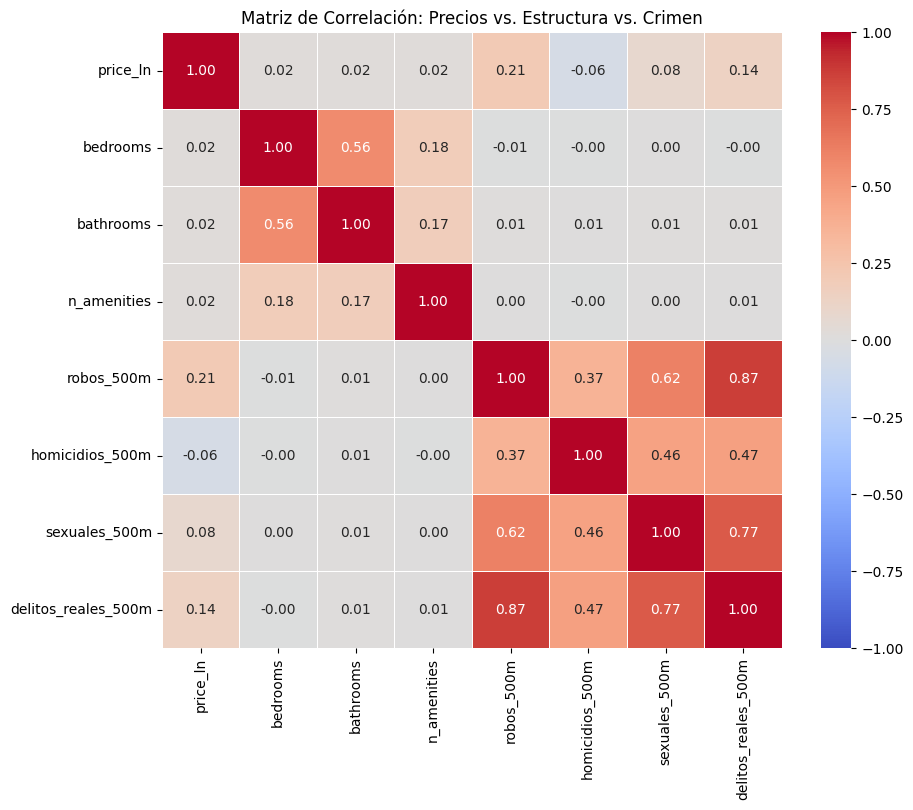

In [ ]:
# 1. Seleccionamos solo las variables numéricas relevantes para tu estudio
# (Excluimos columnas de texto como 'neighbourhood' o IDs para que no falle)
variables_interes = [
    'price_ln',
    'bedrooms',
    'bathrooms',
    'n_amenities',
    'robos_500m',
    'homicidios_500m',
    'sexuales_500m',
    'delitos_reales_500m'
]

# 2. Calculamos la matriz de correlación
matriz_corr = AIRBNBF[variables_interes].corr()

# 3. Graficamos el Heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(
    matriz_corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    center=0,
    vmin=-1, vmax=1
)

plt.title("Matriz de Correlación: Precios vs. Estructura vs. Crimen")
plt.show()

In [ ]:
matriz_corr

,price_ln,bedrooms,bathrooms,n_amenities,robos_500m,homicidios_500m,sexuales_500m,delitos_reales_500m
price_ln,1.000000,0.017250,0.017171,0.020270,0.206274,-0.061341,0.080381,0.137258
bedrooms,0.017250,1.000000,0.564067,0.180102,-0.007701,-0.003051,0.001539,-0.004466
bathrooms,0.017171,0.564067,1.000000,0.173091,0.011262,0.005116,0.011960,0.011844
n_amenities,0.020270,0.180102,0.173091,1.000000,0.004447,-0.003031,0.004587,0.005248
robos_500m,0.206274,-0.007701,0.011262,0.004447,1.000000,0.365548,0.615936,0.867465
homicidios_500m,-0.061341,-0.003051,0.005116,-0.003031,0.365548,1.000000,0.456024,0.468189
sexuales_500m,0.080381,0.001539,0.011960,0.004587,0.615936,0.456024,1.000000,0.770410
delitos_reales_500m,0.137258,-0.004466,0.011844,0.005248,0.867465,0.468189,0.770410,1.000000


/tmp/ipython-input-786823252.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Cuauhtémoc'),
  Text(1, 0, 'Miguel Hidalgo'),
  Text(2, 0, 'Benito Juárez'),
  Text(3, 0, 'Coyoacán'),
  Text(4, 0, 'Álvaro Obregón'),
  Text(5, 0, 'Venustiano Carranza'),
  Text(6, 0, 'Tlalpan'),
  Text(7, 0, 'Gustavo A. Madero'),
  Text(8, 0, 'Iztacalco'),
  Text(9, 0, 'Cuajimalpa de Morelos'),
  Text(10, 0, 'Azcapotzalco'),
  Text(11, 0, 'Iztapalapa'),
  Text(12, 0, 'Xochimilco'),
  Text(13, 0, 'La Magdalena Contreras'),
  Text(14, 0, 'Tláhuac'),
  Text(15, 0, 'Milpa Alta')])

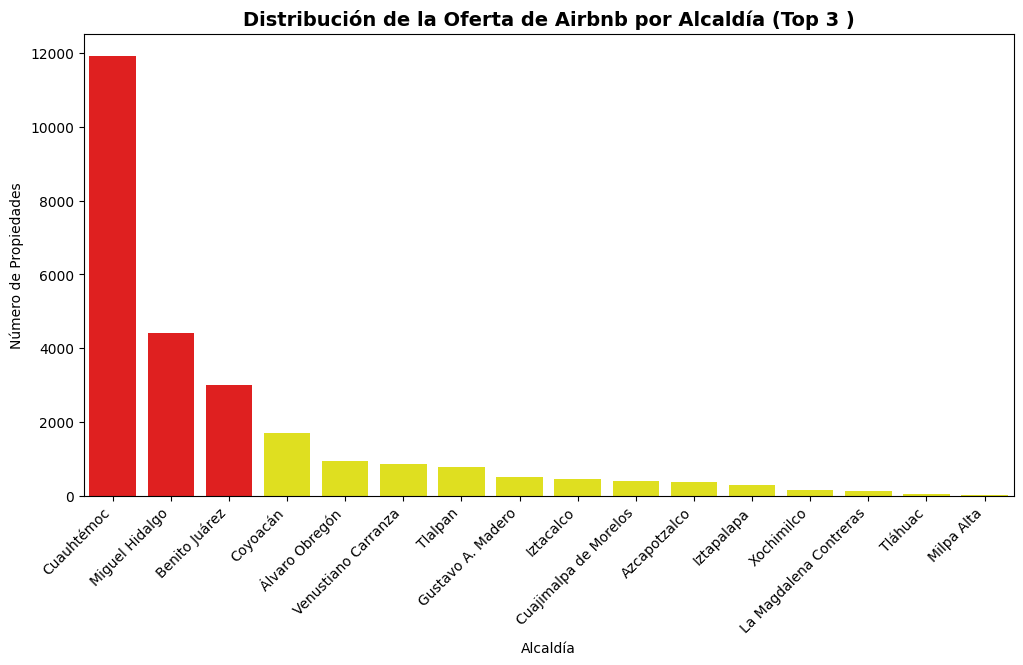

In [ ]:
#Alcaldías
conteo_alcaldias = AIRBNBF['neighbourhood'].value_counts()
top_3_alcaldias = conteo_alcaldias.head(3).index.tolist()
colors = [
    'red' if x in top_3_alcaldias else 'yellow'
    for x in conteo_alcaldias.index
]

# 4. Graficamos
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x=conteo_alcaldias.index,
    y=conteo_alcaldias.values,
    palette=colors
)
plt.title("Distribución de la Oferta de Airbnb por Alcaldía (Top 3 )", fontsize=14, fontweight='bold')
plt.ylabel("Número de Propiedades")
plt.xlabel("Alcaldía")
plt.xticks(rotation=45, ha='right')

/tmp/ipython-input-2100619393.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2100619393.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2100619393.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


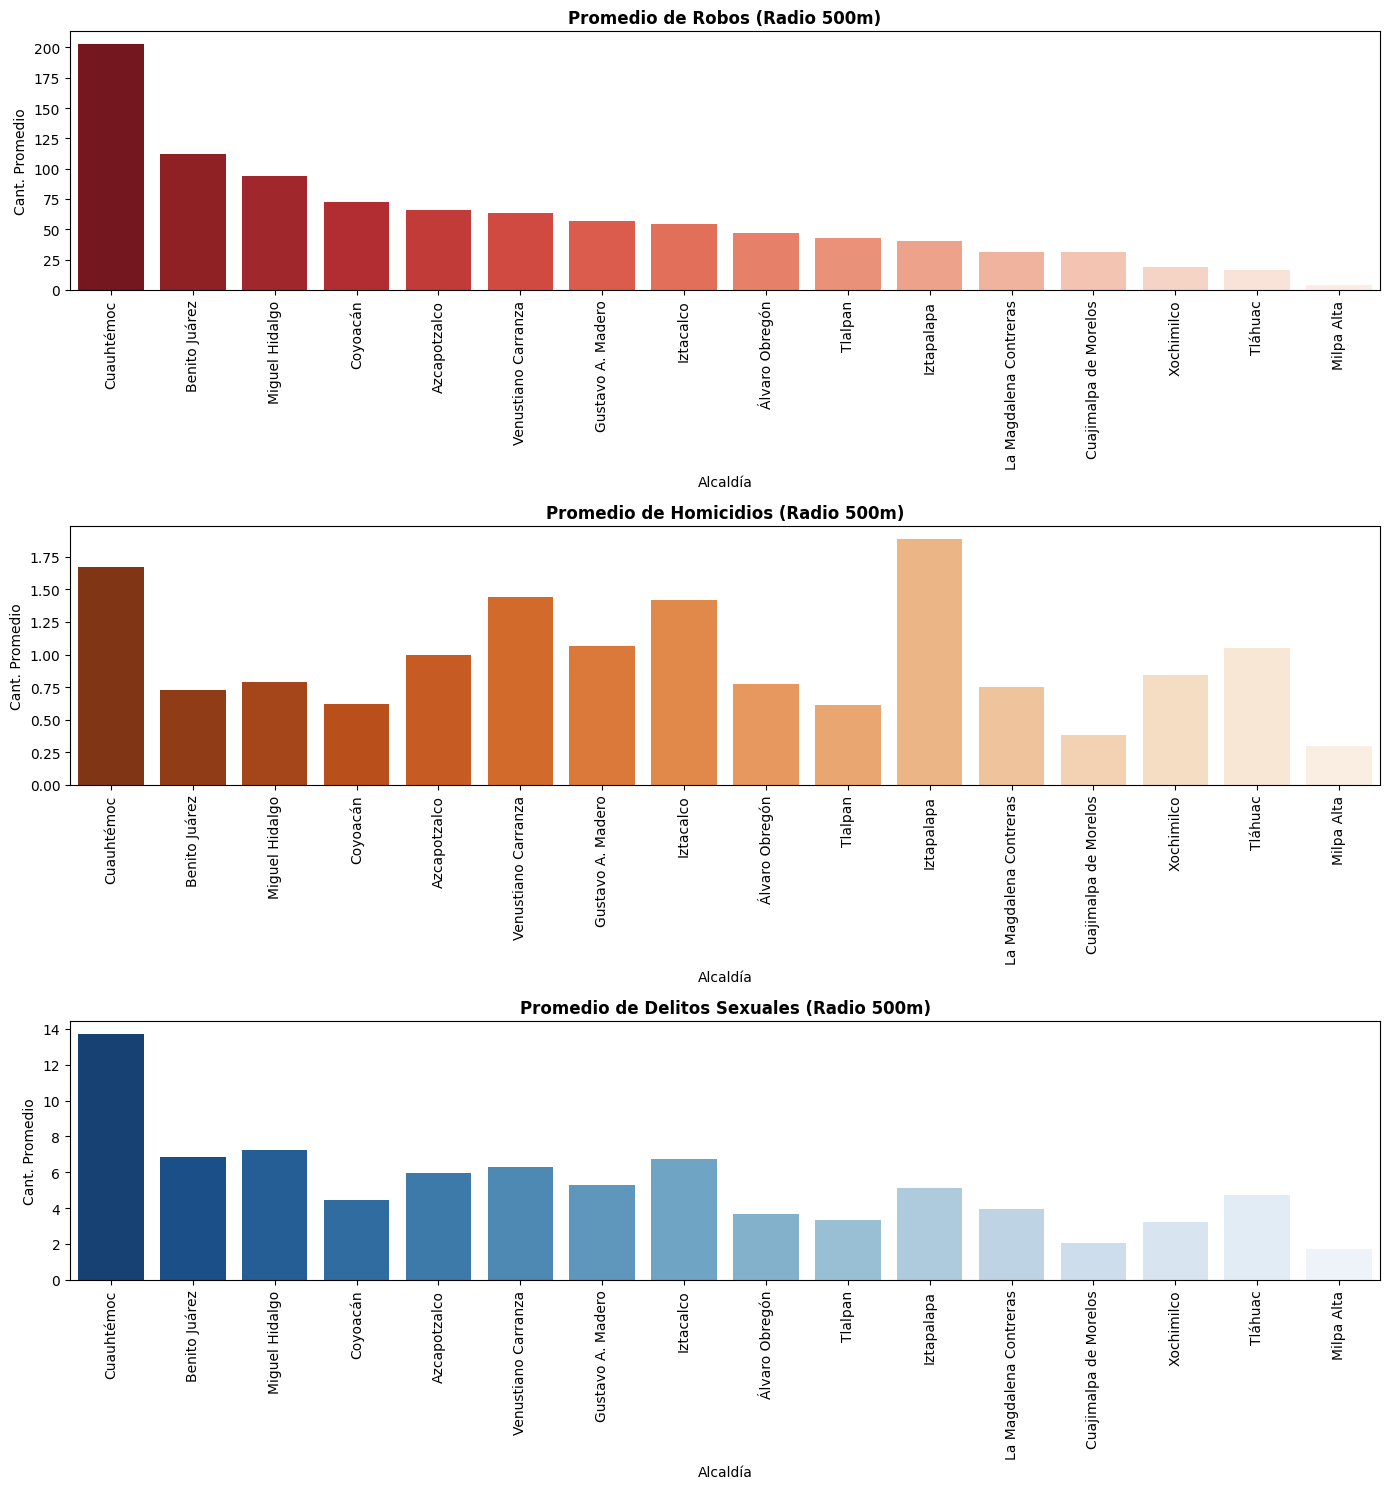

In [ ]:
#Alcaldías y crimenes
crimen_alcaldia = AIRBNBF.groupby('neighbourhood')[
    ['robos_500m', 'homicidios_500m', 'sexuales_500m']
].mean()
#ordennado en base al mas frecuente
crimen_alcaldia = crimen_alcaldia.sort_values('robos_500m', ascending=False)
#Para los subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 15), sharex=False)
#Graficos
sns.barplot(
    x=crimen_alcaldia.index,
    y=crimen_alcaldia['robos_500m'],
    ax=axes[0],
    palette='Reds_r'
)
axes[0].set_title('Promedio de Robos (Radio 500m)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Cant. Promedio')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('Alcaldía')

#Homicidios
sns.barplot(
    x=crimen_alcaldia.index,
    y=crimen_alcaldia['homicidios_500m'],
    ax=axes[1],
    palette='Oranges_r'
)
axes[1].set_title('Promedio de Homicidios (Radio 500m)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cant. Promedio')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xlabel('Alcaldía')

#Sexuales
sns.barplot(
    x=crimen_alcaldia.index,
    y=crimen_alcaldia['sexuales_500m'],
    ax=axes[2],
    palette='Blues_r'
)
axes[2].set_title('Promedio de Delitos Sexuales (Radio 500m)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Cant. Promedio')
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_xlabel('Alcaldía')


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2223039577.py:36: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  burbujas = sns.scatterplot(


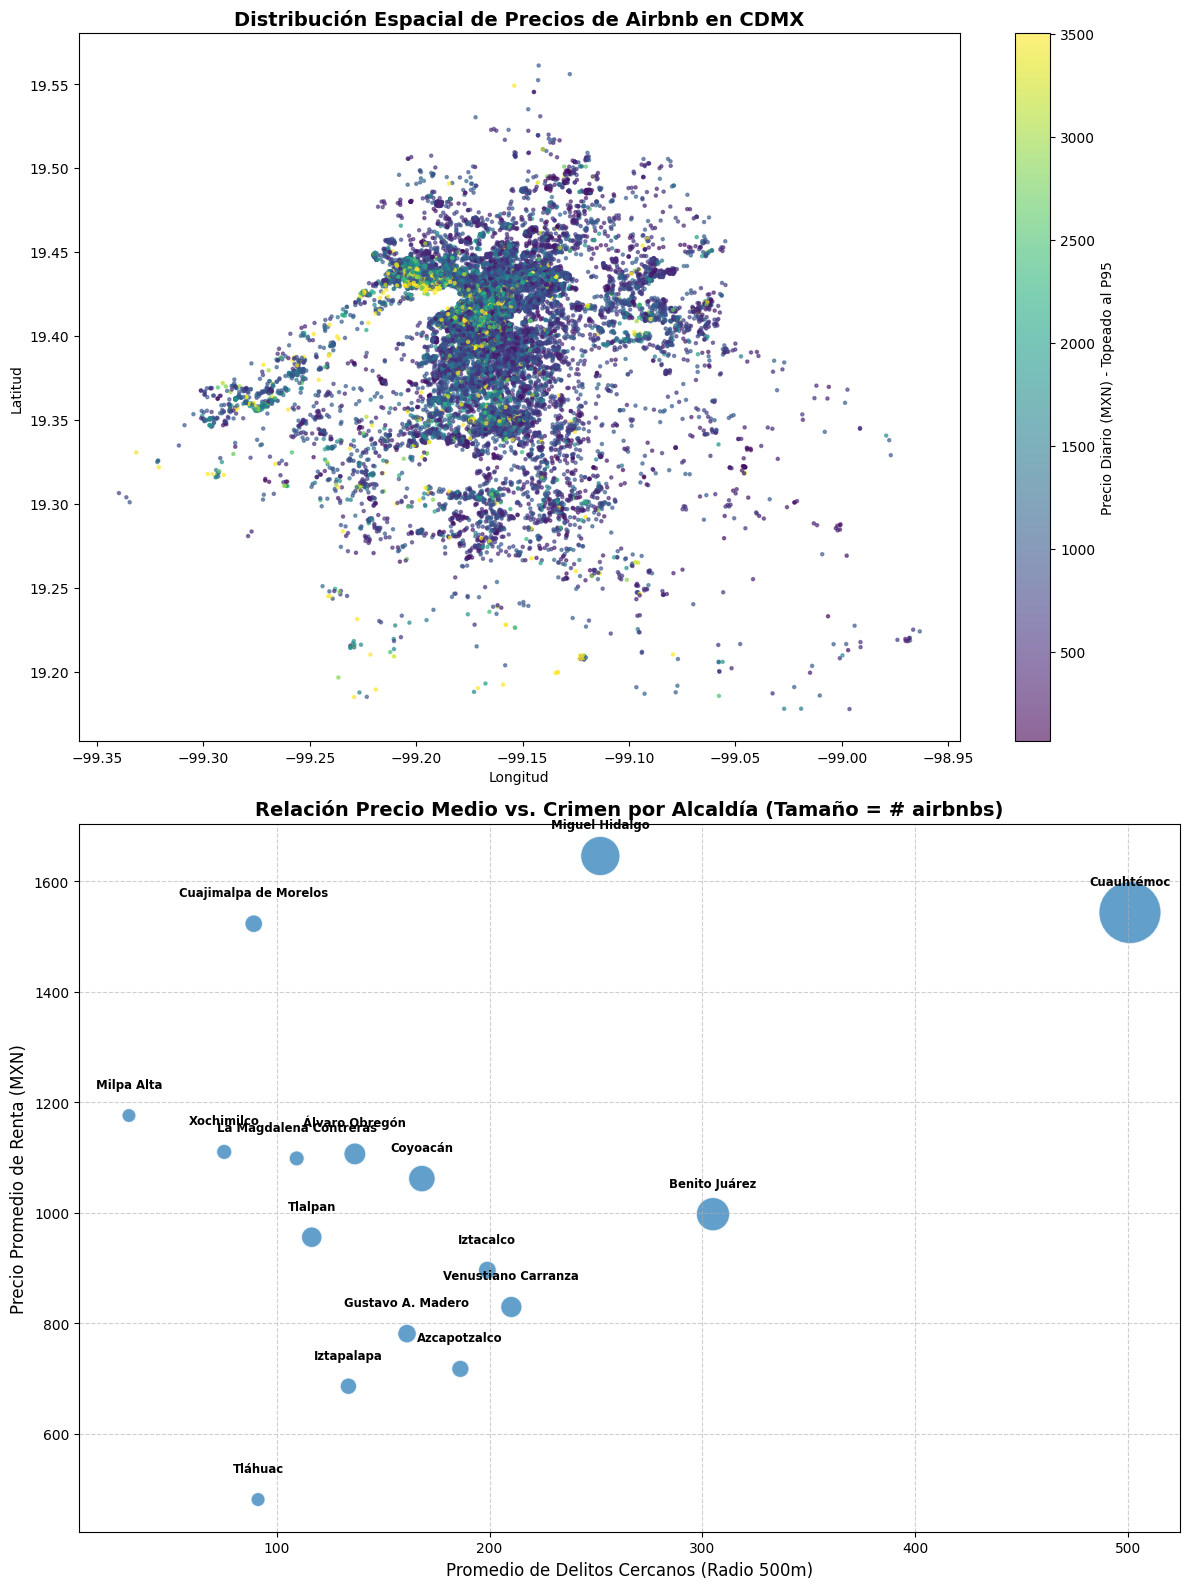

In [ ]:
#Mapa Geoespacial (Alcalsias.precios y crimen)
resumen_alcaldia = AIRBNBF.groupby('neighbourhood').agg({
    'price': 'mean',
    'delitos_reales_500m': 'mean',
    'id': 'count'
}).reset_index()

resumen_alcaldia.columns = ['Alcaldía', 'Precio Promedio', 'Delitos Promedio (500m)', 'Cantidad Listings']
resumen_alcaldia = resumen_alcaldia.sort_values('Cantidad Listings', ascending=False)

#Generando mapa SUPERIOR
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
#TOPANDO PRECIOS AL PERCENTIL 95 PARA OUTLIERS
precio_tope = AIRBNBF['price'].quantile(0.95)
precio_viz = np.where(AIRBNBF['price'] > precio_tope, precio_tope, AIRBNBF['price'])
# 2. Crear el scatter plot geoespacial
mapa = ax1.scatter(
    AIRBNBF['longitude'],
    AIRBNBF['latitude'],
    c=precio_viz,          # El color depende del precio (topeado)
    cmap='viridis',        # Paleta de colores (puedes probar 'plasma', 'inferno')
    s=5,                   # Tamaño del punto pequeño
    alpha=0.6              # Transparencia para ver densidad
)

# 3. Añadir barra de color
cbar = plt.colorbar(mapa, ax=ax1)
cbar.set_label('Precio Diario (MXN) - Topeado al P95')

# 4. Estética del mapa
ax1.set_title('Distribución Espacial de Precios de Airbnb en CDMX', fontsize=14, fontweight='bold')
ax1.set_xlabel('Longitud')
ax1.set_ylabel('Latitud')

#GRAFICO INFERIOR
burbujas = sns.scatterplot(
    data=resumen_alcaldia,
    x='Delitos Promedio (500m)',
    y='Precio Promedio',
    size='Cantidad Listings',
    sizes=(100, 2000),
    alpha=0.7,
    palette='deep',
    legend=False,
    ax=ax2
)

# Iteramos sobre la tabla resumen para poner el nombre sobre cada punto
for i in range(len(resumen_alcaldia)):
    ax2.text(
        resumen_alcaldia.iloc[i]['Delitos Promedio (500m)'] - 0.05,
        resumen_alcaldia.iloc[i]['Precio Promedio'] + 50,
        resumen_alcaldia.iloc[i]['Alcaldía'],
        horizontalalignment='center',
        size='small',
        color='black',
        weight='semibold'
    )

ax2.set_title('Relación Precio Medio vs. Crimen por Alcaldía (Tamaño = # airbnbs)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Promedio de Delitos Cercanos (Radio 500m)', fontsize=12)
ax2.set_ylabel('Precio Promedio de Renta (MXN)', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Modelos sin variables delitos

In [ ]:
import statsmodels.formula.api as smf

En este primer modelo veremos como impacta la cantidad de baños , recamaras amenidades y noches al precio

In [ ]:
formula = 'price_ln ~ C(neighbourhood) + bathrooms + bedrooms + minimum_nights + reviews_per_month  + availability_365 + n_amenities'

In [ ]:
model1 = smf.ols(formula=formula, data=AIRBNBF).fit(cov_type='HC1')
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               price_ln   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     177.4
Date:                Sun, 23 Nov 2025   Prob (F-statistic):               0.00
Time:                        05:09:20   Log-Likelihood:                -21831.
No. Observations:               22758   AIC:                         4.371e+04
Df Residuals:                   22736   BIC:                         4.388e+04
Df Model:                          21                                         
Covariance Type:                  HC1                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
formula1 = 'reviews_per_month ~ C(neighbourhood) + n_amenities + price_ln	+ availability_365 '

In [ ]:
model2 = smf.ols(formula=formula1, data=AIRBNBF).fit(cov_type='HC1')
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     83.34
Date:                Sun, 23 Nov 2025   Prob (F-statistic):          5.13e-298
Time:                        05:18:38   Log-Likelihood:                -48711.
No. Observations:               22758   AIC:                         9.746e+04
Df Residuals:                   22739   BIC:                         9.761e+04
Df Model:                          18                                         
Covariance Type:                  HC1                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
formula2 = 'price_ln ~ C(neighbourhood) + reviews_per_month  + C(neighbourhood)*n_amenities'

In [ ]:
model3 = smf.ols(formula=formula2, data=AIRBNBF).fit(cov_type='HC1')
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:               price_ln   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     116.6
Date:                Sun, 23 Nov 2025   Prob (F-statistic):               0.00
Time:                        05:17:52   Log-Likelihood:                -21826.
No. Observations:               22758   AIC:                         4.372e+04
Df Residuals:                   22725   BIC:                         4.398e+04
Df Model:                          32                                         
Covariance Type:                  HC1                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

# Modelos Agregando la base extra delitos

In [ ]:
formula3 = 'price_ln ~ robos_500m + homicidios_500m + sexuales_500m'

In [ ]:
model4 = smf.ols(formula=formula3, data=AIRBNBF).fit(cov_type='HC1')
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:               price_ln   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     580.6
Date:                Sun, 23 Nov 2025   Prob (F-statistic):               0.00
Time:                        05:22:27   Log-Likelihood:                -26375.
No. Observations:               26004   AIC:                         5.276e+04
Df Residuals:                   26000   BIC:                         5.279e+04
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7513      0.008    8

In [ ]:
formula4 = 'price_ln ~ C(neighbourhood) + robos_500m + homicidios_500m + sexuales_500m'

In [ ]:
model5 = smf.ols(formula=formula4, data=AIRBNBF).fit(cov_type='HC1')
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:               price_ln   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     238.5
Date:                Sun, 23 Nov 2025   Prob (F-statistic):               0.00
Time:                        05:25:07   Log-Likelihood:                -25330.
No. Observations:               26004   AIC:                         5.070e+04
Df Residuals:                   25985   BIC:                         5.085e+04
Df Model:                          18                                         
Covariance Type:                  HC1                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------